# Assignment 6 - Part 1: Tutorial on SQL and Pandas

Tutorial Author: Eni Mustafaraj  
Completed by student: Shreya Parjan

**Summary:** In this notebook, you will perform two steps in the data science cycle, getting data and exploring data. These are iterative steps, as we know. We might need to be in this loop for a while, until we get to know better what questions we can answer with this data. 

**Table of Contents**
1. [Overview - What is the history database](#sec1)
2. [The `sqlite3` module](#sec2)
3. [Explore the table `visits`](#sec3)
4. [Find most visited websites](#sec4)
5. [Connecting with pandas](#sec5)
6. [Joining two tables](#sec6)

<a id="sec1"></a>

## 1. Overview - What is the History database?

The Chrome browser keeps track of interactions you perform while using it:

+ searches you perform on the "location" bar  
+ urls you open either by navigating directly or by clicking on links on a web page

All this information is stored in a file named 'History', which is a database file using the **SQLite format 3** 


If you open the file with a text editor (or do "more History" on a console), at the very top of the file you'll notice: **SQLite format 3**, which is how we know its format. Then, we can either explore the file with the SQLite browser (see Assignment 6 notes), or via Python's module, sqlite3.

<a id="sec2"></a>

## 2. The `sqlite3` module

The most common way to store data is as tables in databases. There are many database systems out there, with the most used ones being **relational database management systems**, which make use of SQL (structured query language). However, NoSQL databases systems like MongoDB or Redis are also very popular. 

SQLite is a database management system that doesn't require a server, which makes it different from more traditional systems like MySQL or Oracle. 

To learn more about SQLite, I recommend [their tutorial](http://www.sqlitetutorial.net/). However, the CS 304 lecture notes we discussed in class have given you sufficient knowledge to understand this tutorial.

We will use Python's interface `sqlite3` to connect to the History file, in order to read its content and submit different queries. 

There is a [very short (one page) tutorial](http://www.sqlitetutorial.net/sqlite-python/sqlite-python-select/) in their website that shows how to talk to SQLite only to query data.

In [1]:
import sqlite3

To talk to a database, we need to establish a connection to it. It's a bit similar to opening files, we have to provide the path to the database.

In [2]:
path = "History" # if you stored the file in the folder
conn = sqlite3.connect(path)

To talk to the database now that we have a connection, we need to create a "cursor" object. Through the cursor we will execute queries in the database, for example, find the tables of a database:

In [3]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
for data in cursor.fetchall():
    print(data)

('meta',)
('urls',)
('sqlite_sequence',)
('visits',)
('visit_source',)
('keyword_search_terms',)
('downloads',)
('downloads_url_chains',)
('downloads_slices',)
('segments',)
('segment_usage',)
('typed_url_sync_metadata',)


We saw above an example of a query: `"SELECT name FROM sqlite_master WHERE type='table';"`. This is a bit more complicated that the queries we will be usually running, because we didn't know what tables are in the database. 


Now that we know the names of the tables, we can write queries to read rows from these tables.

In [4]:
# This means: select everything from the table urls
cursor = conn.execute('SELECT * FROM urls')

# This asks to show a description of the columns of the table
cursor.description

(('id', None, None, None, None, None, None),
 ('url', None, None, None, None, None, None),
 ('title', None, None, None, None, None, None),
 ('visit_count', None, None, None, None, None, None),
 ('typed_count', None, None, None, None, None, None),
 ('last_visit_time', None, None, None, None, None, None),
 ('hidden', None, None, None, None, None, None))

It seems that the only useful information is the name of the columns, so we'll focus on them:

In [5]:
def colnames(crs):
    """helper function to get column names"""
    return [description[0] for description in crs.description]

colnames(cursor)

['id',
 'url',
 'title',
 'visit_count',
 'typed_count',
 'last_visit_time',
 'hidden']

The purpose of knowing the column names is to use them in queries. For example, the query below asks to extract the values of only three columns:

In [6]:
cursor = conn.execute('SELECT url, title, visit_count FROM urls')
rows = cursor.fetchall()
for i in range(10):
    print(rows[i])

('https://sakai.wellesley.edu/portal', 'Sakai : Home : Overview', 44)
('https://machinelearningmastery.com/', 'Machine Learning Mastery', 0)
('https://docs.google.com/document/d/1pYzPRXHfbT1FfqJzYmRwnZujkKDFnNISc0XWVmoInEk/edit?fbclid=IwAR1MMR5v3JKEPw4eiPbC5_QZhdz2Q3HQd-3AnBG_-H9s3lADXvNKRZTlPcE', 'Things to do in Boston (and surrounding areas) by a local - Google Docs', 0)
('https://www.wellesley.edu/', 'Wellesley College', 9)
('https://courses.wellesley.edu/', 'Course Browser', 72)
('https://www.linkedin.com/in/shreya-parjan/', 'Shreya Parjan | LinkedIn', 103)
('https://www.primevideo.com/', 'Prime Video', 1)
('https://www.amazon.com/aiv/ref=atv_prm_rb_ret_web_b', 'Amazon.com: Prime Video: Prime Video', 1)
('https://www.amazon.com/video', 'Amazon.com: Prime Video: Prime Video', 1)
('https://www.amazon.com/Amazon-Video/b/?&node=2858778011', 'Amazon.com: Prime Video: Prime Video', 2)


If we want the values from all columns to be displayed, we will use again * to select everything:

In [7]:
cursor = conn.execute('SELECT * FROM urls')
rows = cursor.fetchall()
for i in range(10):
    print(rows[i])

(53911, 'https://sakai.wellesley.edu/portal', 'Sakai : Home : Overview', 44, 17, 13218496141744308, 0)
(58294, 'https://machinelearningmastery.com/', 'Machine Learning Mastery', 0, 0, 0, 0)
(83474, 'https://docs.google.com/document/d/1pYzPRXHfbT1FfqJzYmRwnZujkKDFnNISc0XWVmoInEk/edit?fbclid=IwAR1MMR5v3JKEPw4eiPbC5_QZhdz2Q3HQd-3AnBG_-H9s3lADXvNKRZTlPcE', 'Things to do in Boston (and surrounding areas) by a local - Google Docs', 0, 0, 0, 0)
(103291, 'https://www.wellesley.edu/', 'Wellesley College', 9, 4, 13219176009839124, 0)
(103295, 'https://courses.wellesley.edu/', 'Course Browser', 72, 61, 13219441646221600, 0)
(103297, 'https://www.linkedin.com/in/shreya-parjan/', 'Shreya Parjan | LinkedIn', 103, 80, 13219429780327366, 0)
(103299, 'https://www.primevideo.com/', 'Prime Video', 1, 1, 13213501369059691, 0)
(103300, 'https://www.amazon.com/aiv/ref=atv_prm_rb_ret_web_b', 'Amazon.com: Prime Video: Prime Video', 1, 0, 13213501372221443, 0)
(103301, 'https://www.amazon.com/video', 'Amazon.c

An interesting column of this table is `last_visit_time`, which doesn't seem to be in a datetime format we know. We'll investigate that format in the next section.

<a id="sec3"></a>

## 3. Explore the table `visits`

One promising table in the database is the one named `visits`, let's look more into it:

In [8]:
cursor = conn.execute('SELECT * FROM visits')
cursor.description

(('id', None, None, None, None, None, None),
 ('url', None, None, None, None, None, None),
 ('visit_time', None, None, None, None, None, None),
 ('from_visit', None, None, None, None, None, None),
 ('transition', None, None, None, None, None, None),
 ('segment_id', None, None, None, None, None, None),
 ('visit_duration', None, None, None, None, None, None),
 ('incremented_omnibox_typed_score', None, None, None, None, None, None))

Let's check what a row looks like, by looking at a few of them:

In [9]:
cursor.fetchall()[:5]

[(7488, 103937, 13211749242018170, 0, 838860801, 0, 0, 1),
 (7489, 103937, 13211749243027380, 0, 805306368, 0, 0, 0),
 (7490, 103937, 13211783739941323, 0, 838860801, 0, 0, 1),
 (7491, 106000, 13211779542201204, 0, 2684354561, 0, 0, 0),
 (7492, 106001, 13211779542201204, 0, 268435457, 0, 0, 1)]

While the column names sound interesting, it looks like the values are not that useful immediately, we'll need to look up the url in the urls table, and need to figure out whether some of the fields have values different from 0.

In [10]:
cursor = conn.execute('SELECT * FROM visits WHERE from_visit != 0 ORDER BY segment_id')
print(colnames(cursor))
rows = cursor.fetchall()
for i in range(5):
    print(rows[i])

['id', 'url', 'visit_time', 'from_visit', 'transition', 'segment_id', 'visit_duration', 'incremented_omnibox_typed_score']
(7540, 105570, 13212039010108657, 7539, 2684354561, 0, 0, 0)
(7573, 106030, 13212051431605855, 7572, 268435463, 0, 0, 0)
(7574, 106031, 13212051431605855, 7573, 2684354567, 0, 0, 0)
(7575, 106028, 13212051433816368, 7572, 805306368, 0, 0, 0)
(7576, 106032, 13212051487098172, 7575, 1073741824, 0, 0, 0)


There are a few interesting observations to make here:

1. The `segment_id` seems like the value that links together several consequtive visits. 
2. Apparently Chrome calculates the visit duration, and stores it in `visit_duration`. We need to learn what unit they are using, most likely microseconds.
3. The `visit_time` is also in a strange format: number of microseconds since January, 1601. [See this SO stack](https://stackoverflow.com/questions/2193820/convert-chrome-history-date-time-stamp-to-readable-format).

To make sense of these data, let's do two things:

- create meaningful timestamps
- connect to the URLs

### Figuring out the time stamps

This [SO thread](https://stackoverflow.com/questions/2193820/convert-chrome-history-date-time-stamp-to-readable-format) explains how to convert Chrome timestamps into datetime:

In [11]:
import datetime

def convertChromeTime(ms):
    """Convert the amount of microsends into a datetime object. 
    Google chrome doesn't use Unix epoch.
    """
    return datetime.datetime(1601, 1, 1) + datetime.timedelta(microseconds=ms)

Let's test the function:

In [12]:
str(convertChromeTime(13209315156230740))

'2019-08-03 14:12:36.230740'

Let's print now both the datetime and the URL of each visit:

**ATTENTION:** If you don't have a segment_id with value 2, try another value (look up your data).

In [27]:
cursor = conn.execute('SELECT * FROM visits WHERE segment_id == 2')

for row in cursor.fetchall()[:10]:
    date = convertChromeTime(row[0]) # index of date
    url = conn.execute('SELECT url FROM urls WHERE id = ?', (row[1],)).fetchall()[0]
    print(str(date)[:19], url)

**Two notes about the code:**
1. Notice the syntax for finding the URL value, there is a question mark in the SQL string, and a tuple as a parameter for the string that provides the value for the question mark.
2. The date string has the milliseconds in it, so we slice at [:19], to get rid of those digits.


Let us now look more into `segment_id`, let's find some other values.

In [14]:
cursor = conn.execute('SELECT DISTINCT segment_id FROM visits;')
rows = cursor.fetchall()
print(len(rows), "unique segment_id's")
for i in range(10):
    print(rows[i])

156 unique segment_id's
(0,)
(630,)
(617,)
(613,)
(610,)
(634,)
(621,)
(604,)
(606,)
(635,)


So, there are plenty of `segment_id`s, which then occur many times. Let's check another `segment_id`. **Make sure you have this number. I'm trying 42, which is in the list.**

In [15]:
cursor = conn.execute('SELECT * FROM visits WHERE segment_id == 42')

for row in cursor.fetchall()[:10]:
    date = convertChromeTime(row[2]) # index of date
    url = conn.execute('SELECT url FROM urls WHERE id = ?', (row[1],)).fetchall()[0]
    print(str(date)[:19], url)

Look up the last ten rows:

In [17]:
cursor = conn.execute('SELECT * FROM visits WHERE segment_id == 42')

for row in cursor.fetchall()[-10:]: # the last ten rows
    date = convertChromeTime(row[2]) # index of date
    url = conn.execute('SELECT url FROM urls WHERE id = ?', (row[1],)).fetchall()[0]
    print(str(date)[:19], url)

Thus, it certainly looks like segment_id is associated with visits on the same website, but such visit cna happen across multiple days.

<a id="sec4"></a>

## 4. Find most visited website

In the beginning of the notebook we saw that the table url contains counts for visits on particular URLs:

In [18]:
cursor = conn.execute('SELECT url, title, visit_count FROM urls')
cursor.fetchall()[:10]

[('https://sakai.wellesley.edu/portal', 'Sakai : Home : Overview', 44),
 ('https://machinelearningmastery.com/', 'Machine Learning Mastery', 0),
 ('https://docs.google.com/document/d/1pYzPRXHfbT1FfqJzYmRwnZujkKDFnNISc0XWVmoInEk/edit?fbclid=IwAR1MMR5v3JKEPw4eiPbC5_QZhdz2Q3HQd-3AnBG_-H9s3lADXvNKRZTlPcE',
  'Things to do in Boston (and surrounding areas) by a local - Google Docs',
  0),
 ('https://www.wellesley.edu/', 'Wellesley College', 9),
 ('https://courses.wellesley.edu/', 'Course Browser', 72),
 ('https://www.linkedin.com/in/shreya-parjan/',
  'Shreya Parjan | LinkedIn',
  103),
 ('https://www.primevideo.com/', 'Prime Video', 1),
 ('https://www.amazon.com/aiv/ref=atv_prm_rb_ret_web_b',
  'Amazon.com: Prime Video: Prime Video',
  1),
 ('https://www.amazon.com/video', 'Amazon.com: Prime Video: Prime Video', 1),
 ('https://www.amazon.com/Amazon-Video/b/?&node=2858778011',
  'Amazon.com: Prime Video: Prime Video',
  2)]

But this data contains a lot of repetitions, because it's looking at unique URLs, instead of domain names. Thus, it makes sense to only look for domain names.

### Extracting domain names from URLs

We don't need to do anything special, we simply use one of Python's libraries for parsing URLs:

In [19]:
from urllib import parse

In [20]:
parse.urlparse('https://portal.wellesley.edu/frontpage?destination=frontpage')

ParseResult(scheme='https', netloc='portal.wellesley.edu', path='/frontpage', params='', query='destination=frontpage', fragment='')

There are multiple parts here, we are interested in "netloc":

In [21]:
parse.urlparse('https://portal.wellesley.edu/frontpage?destination=frontpage').netloc

'portal.wellesley.edu'

### Counting domain names

The algorithm:
- get every URL and its count as it is shown in the urls table
- extract the domain name (that leaves out specific parts of the URL)
- update count of domain names

In [22]:
from collections import Counter

domainCounter = Counter()
cursor = conn.execute('SELECT url, visit_count FROM urls')

for row in cursor.fetchall():
    url, count = row # grab the exisiting count for that URL
    domain = parse.urlparse(url).netloc
    domainCounter[domain] += count # accumulate URL counts
    
domainCounter.most_common(10)

[('docs.google.com', 28673),
 ('www.google.com', 6605),
 ('mail.google.com', 4048),
 ('oemmndcbldboiebfnladdacbdfmadadm', 3882),
 ('www.messenger.com', 2301),
 ('drive.google.com', 2227),
 ('calendar.google.com', 1335),
 ('www.linkedin.com', 1182),
 ('www.facebook.com', 1081),
 ('translate.google.com', 990)]

My results look like this:

```
[('docs.google.com', 70933),
 ('mail.google.com', 16455),
 ('www.google.com', 4068),
 ('calendar.google.com', 3644),
 ('cs.wellesley.edu', 2740),
 ('slides.com', 1785),
 ('', 1543),
 ('webapps.wellesley.edu', 1425),
 ('drive.google.com', 1364),
 ('classroom.google.com', 1334)]
```

They clearly indicate how much my work relies on Google docs and email and that I work at Wellesley CS, and that I'm using Google Classrooom this semester. 

What does your top 10 look like? Describe them below. What do they say about you?

Most of my top sites are associated with Google productivity tools. They would confirm that I'm a student or young professional. However, I'm unsure what my fourth most popular site is referring to. Upon further investigation, 'oemmndcbldboiebfnladdacbdfmadadm' seems to refer to extension I downloaded to open pdfs in my browser.

<a id="sec5"></a>

## 5. Connecting with pandas

It turns out, the almighty `pandas` can talk the `sqlite3` and convert tables into dataframes.

In [28]:
import pandas as pd

In [29]:
# notice the second argument, the variable that stores the connection
df = pd.read_sql_query("SELECT * FROM urls", conn)
df.head()

,id,url,title,visit_count,typed_count,last_visit_time,hidden
0,53911,https://sakai.wellesley.edu/portal,Sakai : Home : Overview,44,17,13218496141744308,0
1,58294,https://machinelearningmastery.com/,Machine Learning Mastery,0,0,0,0
2,83474,https://docs.google.com/document/d/1pYzPRXHfbT...,Things to do in Boston (and surrounding areas)...,0,0,0,0
3,103291,https://www.wellesley.edu/,Wellesley College,9,4,13219176009839124,0
4,103295,https://courses.wellesley.edu/,Course Browser,72,61,13219441646221600,0


Remember vectorized operations? That is, operations that through the method `apply` can be applied to the whole column. We can apply the helper function `convertChromeTime` to the column `last_visit_time` to get the datetime:

In [30]:
# I'm creating a new column in the dataframe
df['datetime'] = df['last_visit_time'].apply(convertChromeTime)

In [31]:
df.head()

,id,url,title,visit_count,typed_count,last_visit_time,hidden,datetime
0,53911,https://sakai.wellesley.edu/portal,Sakai : Home : Overview,44,17,13218496141744308,0,2019-11-17 20:29:01.744308
1,58294,https://machinelearningmastery.com/,Machine Learning Mastery,0,0,0,0,1601-01-01 00:00:00
2,83474,https://docs.google.com/document/d/1pYzPRXHfbT...,Things to do in Boston (and surrounding areas)...,0,0,0,0,1601-01-01 00:00:00
3,103291,https://www.wellesley.edu/,Wellesley College,9,4,13219176009839124,0,2019-11-25 17:20:09.839124
4,103295,https://courses.wellesley.edu/,Course Browser,72,61,13219441646221600,0,2019-11-28 19:07:26.221600


Find how many URLs:

In [32]:
df.shape

(15688, 8)

<a href="sec6"></a>

## 6. Joining two tables

When we expored the `visits` table, we saw that most of the table contained ID values that point to other tables. For example, the URL value is in the URLS table. We showed an example where we used two different SQL queries: 1) first get rows from `visit`, 2) then look up the url value in the urls tablee. A better way is to combine the two tables together, that is, to join them. 

Joining is a topic in database theory (briefly mentioned in other slides too), you can read more in this website: [SQLite inner join](http://www.sqlitetutorial.net/sqlite-inner-join/). 

For our two tables `visits` and `urls`, we'll do the following

```
SELECT urls.url, visit_time, visit_duration 
FROM visits
INNER JOIN urls on urls.id = visits.url
```

let's try it out:

In [33]:
cursor = conn.execute("SELECT urls.url, visit_time, visit_duration FROM visits INNER JOIN urls on urls.id = visits.url")
cursor.fetchall()[:3]

[('https://wellesley.bncollege.com/shop/wellesley/BNCBMyCoursesView?storeId=67736&catalogId=10001&langId=-1&section_1=91659120&campusId=&section_1=91659120&campusId=',
  13211749242018170,
  0),
 ('https://wellesley.bncollege.com/shop/wellesley/BNCBMyCoursesView?storeId=67736&catalogId=10001&langId=-1&section_1=91659120&campusId=&section_1=91659120&campusId=',
  13211749243027380,
  0),
 ('https://wellesley.bncollege.com/shop/wellesley/BNCBMyCoursesView?storeId=67736&catalogId=10001&langId=-1&section_1=91659120&campusId=&section_1=91659120&campusId=',
  13211783739941323,
  0)]

Now that we know that the query works, we can create the dataframe of the join:

In [34]:
query = "SELECT urls.url, visit_time, visit_duration FROM visits INNER JOIN urls on urls.id = visits.url"
visitAndURLs = pd.read_sql_query(query, conn)
visitAndURLs.head()

,url,visit_time,visit_duration
0,https://wellesley.bncollege.com/shop/wellesley...,13211749242018170,0
1,https://wellesley.bncollege.com/shop/wellesley...,13211749243027380,0
2,https://wellesley.bncollege.com/shop/wellesley...,13211783739941323,0
3,https://thecarlylesupremium.com/,13211779542201204,0
4,http://thecarlylesupremium.com/,13211779542201204,0


Let's change the times and duration:

In [35]:
df = visitAndURLs
df['visit_duration'] = df['visit_duration'].apply(lambda x: x/1000000.) # convert into seconds
df['visit_time'] = df['visit_time'].apply(convertChromeTime)
df.head()

,url,visit_time,visit_duration
0,https://wellesley.bncollege.com/shop/wellesley...,2019-08-31 18:20:42.018170,0.0
1,https://wellesley.bncollege.com/shop/wellesley...,2019-08-31 18:20:43.027380,0.0
2,https://wellesley.bncollege.com/shop/wellesley...,2019-09-01 03:55:39.941323,0.0
3,https://thecarlylesupremium.com/,2019-09-01 02:45:42.201204,0.0
4,http://thecarlylesupremium.com/,2019-09-01 02:45:42.201204,0.0


In [36]:
df.tail()

,url,visit_time,visit_duration
66765,https://www.google.com/search?q=download+chrom...,2019-11-29 17:15:53.298529,0.0
66766,https://www.google.com/search?q=download+chrom...,2019-11-29 17:15:54.046805,0.0
66767,https://superuser.com/questions/359996/export-...,2019-11-29 17:15:55.482710,0.0
66768,https://chrome.google.com/webstore/detail/expo...,2019-11-29 17:16:06.840659,0.0
66769,https://superuser.com/questions/359996/export-...,2019-11-29 17:16:12.911349,0.0


What we can see here (and I was able to confirm on the Web) is that the history is kept only for the past 3 months. If we need history before that, one would have to store the database in a different file, so that it's not rewritten by Google.

We can look up how long the visits are, by asking for the description statistics:

In [37]:
df['visit_duration'].describe()

count     66770.000000
mean        283.942406
std        3652.141063
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      275148.596458
Name: visit_duration, dtype: float64

It looks like the majority is 0.0 sec, maybe because the browser has a hard time calculating visits. This would be a very skewed distribution.

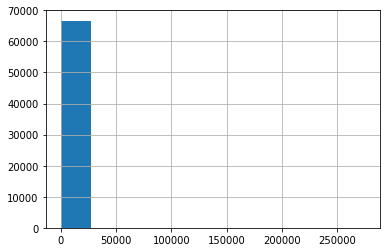

In [38]:
%matplotlib inline 
df['visit_duration'].hist()

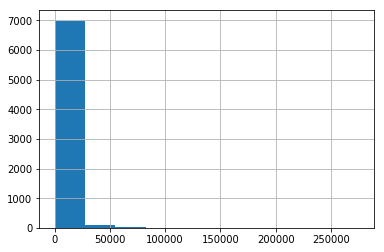

In [39]:
nonZero = df.visit_duration[df.visit_duration>1]
nonZero.hist()

Now that you got a sense of how to work with SQL and Pandas, go to Part 2 to do your solo explorations.

<a id="sec7"></a>